# 2021/12/27
# 本代码绘制论文version1.0中的fig3 c
# 内容为等熵面(纬向差异）及uw风场

In [2]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
from matplotlib.path import Path
import matplotlib.patches as patches

path =   "/home/sun/qomo-data/"
lon_slice  =  slice(50,120)
lat_slice  =  slice(10,15)
lev_slice  =  slice(1000,200)

f1   =   xr.open_dataset(path+"composite_equivalent_tem.nc").sel(lon=lon_slice,lat=lat_slice,level=lev_slice).isel(time=slice(0,30))

theta1      =  f1.theate_e
avg_theta   =  np.average(np.average(theta1,axis=0),axis=1)

f2     =  xr.open_dataset("/home/sun/qomo-data/composite3.nc").sel(lat=slice(10,15),lon=lon_slice,level=lev_slice)
uwind  =  np.average(np.average(f2.uwind[0:30],axis=0),axis=1)
vwind  =  np.average(np.average(f2.vwind[0:30],axis=0),axis=1)
omega  =  np.average(np.average(f2.OMEGA[0:30],axis=0),axis=1)*-60

# 计算纬向偏差值
f3   =   xr.open_dataset(path+"composite_equivalent_tem.nc").sel(lat=lat_slice,level=lev_slice).isel(time=slice(0,30))

theta3      =  f3.theate_e
avg_theta3  =  np.nanmean(np.nanmean(np.nanmean(theta1,axis=0),axis=1),axis=1)

for i in range(0,113):
    avg_theta[:,i]  =  avg_theta[:,i] - avg_theta3

# 计算散度
f4   =   xr.open_dataset(path+"composite-div_vor.nc").sel(lat=slice(10,15),lon=lon_slice,level=lev_slice)
div  =   np.nanmean(np.nanmean(f4.div[0:30],axis=0),axis=1)

# 计算地形
f5   =   xr.open_dataset("/home/sun/data/gebco/bathymetric.nc").sel(lat=slice(10,15),lon=lon_slice)
dixing  =  f5.elevation.data
dixing[dixing <= 0]  =  0
topo    =  np.average(dixing,axis=0)

/tmp/ipykernel_2463542/3141758225.py:34: RuntimeWarning: Mean of empty slice
  avg_theta3  =  np.nanmean(np.nanmean(np.nanmean(theta1,axis=0),axis=1),axis=1)
/tmp/ipykernel_2463542/3141758225.py:41: RuntimeWarning: Mean of empty slice
  div  =   np.nanmean(np.nanmean(f4.div[0:30],axis=0),axis=1)


/tmp/ipykernel_2463542/2305627098.py:7: UserWarning: The following kwargs were not used by contour: 'linewidth', 'negative_linestyle'
  im1   =  ax.contour(f1.lon,f1.level,avg_theta,np.linspace(-2,4,13),linewidth=0.9,colors='grey',negative_linestyle='dashed',zorder=1,alpha=0.9)
/tmp/ipykernel_2463542/2305627098.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(generate_lon_label(50,120,10))


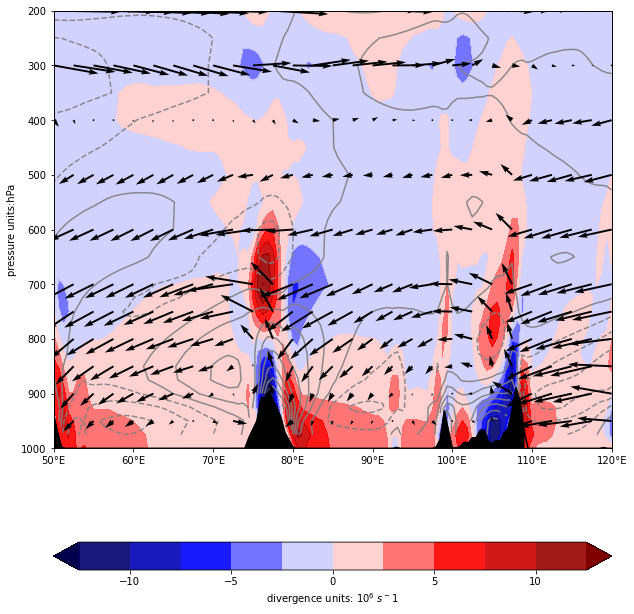

In [5]:
# 创建画布
fig  =  plt.figure(figsize=(13,10))
ax   =  fig.add_subplot()
ax.invert_yaxis()

# 绘制等值线
im1   =  ax.contour(f1.lon,f1.level,avg_theta,np.linspace(-2,4,13),linewidth=0.9,colors='grey',negative_linestyle='dashed',zorder=1,alpha=0.9)
im2   =  ax.contourf(f4.lon,f4.level,div,12,cmap='seismic',extend='both',alpha=0.9,zorder=0)
q  =  ax.quiver(f2.lon[::4], f2.level[::2], uwind[::2,::4], omega[::2,::4], 
                angles='uv',# regrid_shape这个参数越小，是两门就越稀疏
                scale_units='xy', scale=1.1,        # scale是参考矢量，所以取得越大画出来的箭头就越短
                units='xy', width=2.2,
                color='k',zorder=2)
fig.colorbar(im2,label='divergence units: ${10^6}$ ${s^-1}$',orientation='horizontal')

ax.set_xticklabels(generate_lon_label(50,120,10))

ax.set_ylabel("pressure units:hPa")

# 添加地形
ax2  =  ax.twinx()
ax2.set_ylim((0,4.5))
#ax2.set_yticks(np.arange(0,21,1))
ax2.plot(f5.lon.data,topo/1000,color='k')
ax2.fill_between(f5.lon.data,0,topo/1000,where=topo>0,color='k')

ax2.set_yticklabels([])
ax2.set_yticks([])

!mkdir -p /home/sun/paint/lunwen/version1.1
plt.savefig("/home/sun/paint/lunwen/version2.0/lunwen_v2.0_fig2d_div_theta_vector.pdf",dpi=350)

# 草稿区

In [118]:
np.linspace(-2,4,12)

array([-2.        , -1.45454545, -0.90909091, -0.36363636,  0.18181818,
        0.72727273,  1.27272727,  1.81818182,  2.36363636,  2.90909091,
        3.45454545,  4.        ])

In [18]:
np.nanmax(avg_theta)

4.299371172764836